In [1]:
raw_data <- read.csv("Strategic_Subject_List.csv", sep=",", header=T, strip.white = T, na.strings = c("NA","NaN","","?"))
#Converting the "." in column names to "_"
names(raw_data)<-gsub("\\.", "_", names(raw_data))
cat("The Number of Rows in Initial Data is", nrow(raw_data))

The Number of Rows in Initial Data is 398684

In [8]:
final_features<-raw_data[,c("SEX_CODE_CD","RACE_CODE_CD")]

In [9]:
complete_data <- final_features[complete.cases(final_features),]

In [10]:
complete_data$SEX_CODE_CD <- as.factor(complete_data$SEX_CODE_CD)
complete_data$RACE_CODE_CD<- as.factor(complete_data$RACE_CODE_CD)

In [16]:
library('gmodels')
join = CrossTable(complete_data$SEX_CODE_CD,complete_data$RACE_CODE)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  398684 

 
                          | complete_data$RACE_CODE 
complete_data$SEX_CODE_CD |       API |       BLK |         I |         U |       WBH |       WHI |       WWH | Row Total | 
--------------------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|
                        F |      1131 |     54842 |        75 |       435 |       414 |     20589 |     18821 |     96307 | 
                          |     0.221 |   427.936 |     1.040 |     1.227 |     8.282 |    24.101 |  1150.952 |           | 
                          |     0.012 |     0.569 |     0.001 |     0.005 |     0.004 |     0.214 |     0.195 |     0.242 | 
                          |     0.245 |     0.264 |     0.272 |

In [14]:
join

$t
   y
x      API    BLK      I      U    WBH    WHI    WWH
  F   1131  54842     75    435    414  20589  18821
  M   3486 152975    201   1464   1559  61764  80871
  X      0     25      0      0      1     13     18

$prop.row
   y
x            API          BLK            I            U          WBH
  F 0.0117436946 0.5694497804 0.0007787596 0.0045168056 0.0042987529
  M 0.0115308283 0.5060035724 0.0006648584 0.0048425509 0.0051567875
  X 0.0000000000 0.4385964912 0.0000000000 0.0000000000 0.0175438596
   y
x            WHI          WWH
  F 0.2137850831 0.1954271237
  M 0.2043000794 0.2675013231
  X 0.2280701754 0.3157894737

$prop.col
   y
x            API          BLK            I            U          WBH
  F 0.2449642625 0.2638638966 0.2717391304 0.2290679305 0.2097264438
  M 0.7550357375 0.7360158197 0.7282608696 0.7709320695 0.7897669706
  X 0.0000000000 0.0001202837 0.0000000000 0.0000000000 0.0005065856
   y
x            WHI          WWH
  F 0.2499696477 0.1887573964
  M 0.

In [18]:
join_counts = join$t

Warning message in plot.window(xlim, ylim, log = log, ...):
""vlab" is not a graphical parameter"Warning message in axis(if (horiz) 2 else 1, at = at.l, labels = names.arg, lty = axis.lty, :
""vlab" is not a graphical parameter"Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
""vlab" is not a graphical parameter"Warning message in axis(if (horiz) 1 else 2, cex.axis = cex.axis, ...):
""vlab" is not a graphical parameter"

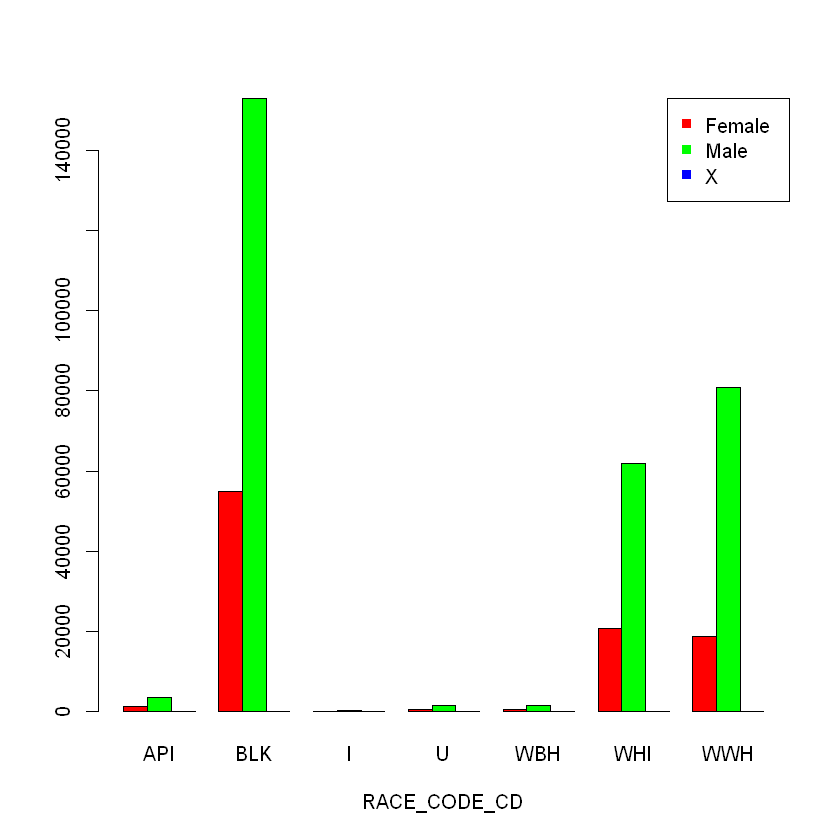

In [25]:
barplot(join_counts,beside=TRUE, col=rainbow(3),vlab='Frequency',xlab = 'RACE_CODE_CD')
legend('topright',c('Female', 'Male', 'X'),pch=15,col=rainbow(3))